Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Classes: ['class_0' 'class_1' 'class_2']


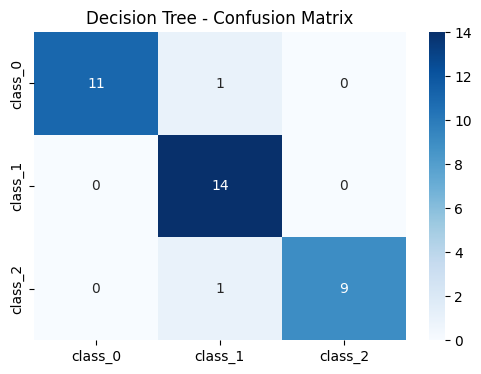

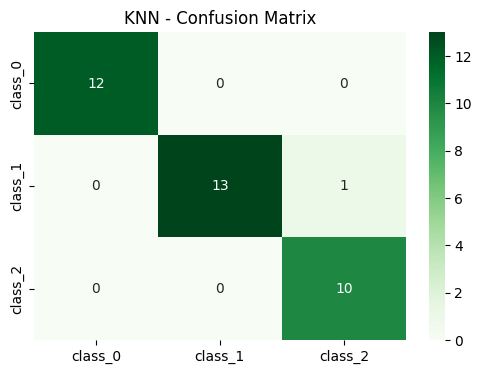

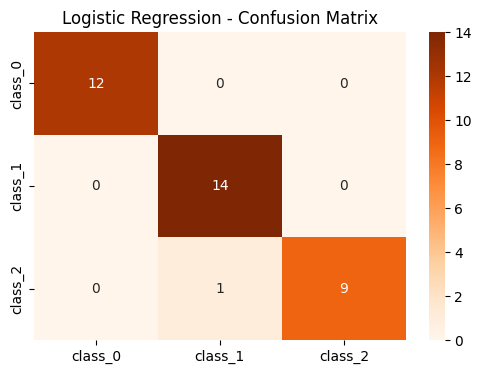

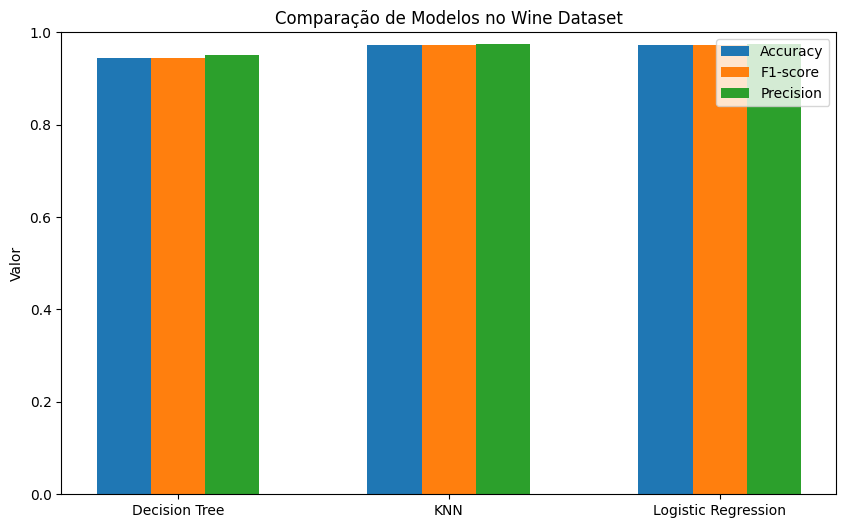


📌 Decision Tree
   Accuracy: 0.9444
   F1-score: 0.9450
   Precision: 0.9514

📌 KNN
   Accuracy: 0.9722
   F1-score: 0.9724
   Precision: 0.9747

📌 Logistic Regression
   Accuracy: 0.9722
   F1-score: 0.9720
   Precision: 0.9741

✅ Melhor modelo: KNN com acurácia de 0.9722

=== Conclusões da Atividade ===

1) Qual modelo apresentou melhor desempenho? 
👉 KNN com acurácia de 0.9722

2) O resultado faz sentido?
👉 Sim. O dataset Wine possui atributos numéricos bem distintos entre as classes, o que favorece algoritmos baseados em distância, como o KNN.

3) O que poderia ser feito para melhorar os modelos?
👉 Algumas possibilidades são:
- Ajustar hiperparâmetros (ex.: número de vizinhos no KNN, profundidade da árvore, regularização da LR);
- Testar outras técnicas de normalização/padronização;
- Avaliar modelos adicionais (ex.: Random Forest, SVM);
- Aumentar o dataset ou aplicar técnicas de data augmentation.


In [2]:


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# Carregar dataset Wine (Vinho)
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
class_names = wine.target_names

print("Features:", feature_names)
print("Classes:", class_names)


# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

results = {}


# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

results["Decision Tree"] = {
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "F1-score": f1_score(y_test, y_pred_dt, average="weighted"),
    "Precision": precision_score(y_test, y_pred_dt, average="weighted"),
}

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d",
            cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Decision Tree - Confusion Matrix")
plt.show()


# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

results["KNN"] = {
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "F1-score": f1_score(y_test, y_pred_knn, average="weighted"),
    "Precision": precision_score(y_test, y_pred_knn, average="weighted"),
}

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d",
            cmap="Greens", xticklabels=class_names, yticklabels=class_names)
plt.title("KNN - Confusion Matrix")
plt.show()


# Logistic Regression
lr_model = LogisticRegression(max_iter=5000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

results["Logistic Regression"] = {
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "F1-score": f1_score(y_test, y_pred_lr, average="weighted"),
    "Precision": precision_score(y_test, y_pred_lr, average="weighted"),
}

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d",
            cmap="Oranges", xticklabels=class_names, yticklabels=class_names)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


# Comparação gráfica
metrics = ["Accuracy", "F1-score", "Precision"]
x = np.arange(len(results))
width = 0.2

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    values = [results[m][metric] for m in results]
    plt.bar(x + i*width - width, values, width, label=metric)

plt.xticks(x, results.keys())
plt.ylim(0, 1)
plt.title("Comparação de Modelos no Wine Dataset")
plt.ylabel("Valor")
plt.legend()
plt.show()


# Métricas
for model, scores in results.items():
    print(f"\n📌 {model}")
    for metric, value in scores.items():
        print(f"   {metric}: {value:.4f}")

best_model = max(results, key=lambda m: results[m]["Accuracy"])
print(f"\n✅ Melhor modelo: {best_model} com acurácia de {results[best_model]['Accuracy']:.4f}")



print("\n=== Conclusões da Atividade ===")

# 1. Qual modelo apresentou melhor desempenho?
print(f"\n1) Qual modelo apresentou melhor desempenho? \n👉 {best_model} "
      f"com acurácia de {results[best_model]['Accuracy']:.4f}")

# 2. O resultado faz sentido?
print("\n2) O resultado faz sentido?")
if best_model == "KNN":
    print("👉 Sim. O dataset Wine possui atributos numéricos bem distintos entre as classes, "
          "o que favorece algoritmos baseados em distância, como o KNN.")
elif best_model == "Decision Tree":
    print("👉 Sim. A Decision Tree funciona bem em dados tabulares, criando divisões claras "
          "entre as classes do vinho.")
else:
    print("👉 Sim. A Regressão Logística consegue encontrar boas fronteiras lineares, "
          "fazendo sentido em um dataset com classes relativamente separáveis.")

# 3. O que poderia ser feito para melhorar os modelos?
print("\n3) O que poderia ser feito para melhorar os modelos?")
print("👉 Algumas possibilidades são:\n"
      "- Ajustar hiperparâmetros (ex.: número de vizinhos no KNN, profundidade da árvore, regularização da LR);\n"
      "- Testar outras técnicas de normalização/padronização;\n"
      "- Avaliar modelos adicionais (ex.: Random Forest, SVM);\n"
      "- Aumentar o dataset ou aplicar técnicas de data augmentation.")



